In [2]:
import numpy as np  # noqa
from typing import Callable  # noqa
import math  # noqa
import matplotlib.pyplot as plt  # noqa
import itertools  # noqa
import functools  # noqa
from scipy.stats import poisson  # noqa
import time  # noqa

In [ ]:
loc_1_cars = 20
loc_2_cars = 2

num_cars = 20

# Num rent is some infinite distribution
# But in reality it ranges from number of cars available to 0 (we can adjust the PMF correspondingly)
# Num return is also some infinite dist, but it ranges from 0 to num_cars - num_rent

# So given loc_1_cars and loc_2_cars, we can find the range of num_rent and num_ret respectively
# We iterate and come up with all possible combinations of these values
# Use their probability distributions to calculate probabilities of each end state

In [12]:
poisson.pmf([1, 2, 3], 3)

array([0.14936121, 0.22404181, 0.22404181])

In [12]:
# one = np.arange(5)
# two = np.arange(5)
# one - two


def final_state_prob_dist(max_cars, loc_1_cars, rent_poisson, return_poisson):
    # Multiply number of cars that can be rented with number of cars that can be returned
    num_rows = (loc_1_cars + 1) * (max_cars + 1)
    loc_1_cars_list = np.repeat(loc_1_cars, num_rows)
    loc_1_cars_rent_list = np.repeat(np.arange(loc_1_cars + 1), max_cars + 1)
    loc_1_cars_return_list = np.tile(np.arange(max_cars + 1), loc_1_cars + 1)
    # print(loc_1_cars_list)
    # print(loc_1_cars_rent_list)
    # print(loc_1_cars_return_list)

    final = loc_1_cars - loc_1_cars_rent_list + loc_1_cars_return_list
    # print(final)
    # Get the indices of the states where the final number of cars is less than or equal to max_cars
    indices = np.where(final <= max_cars)

    loc_1_cars_list = loc_1_cars_list[indices]
    loc_1_cars_rent_list = loc_1_cars_rent_list[indices]
    loc_1_cars_return_list = loc_1_cars_return_list[indices]
    # print(loc_1_cars_list)
    # print(loc_1_cars_rent_list)
    # print(loc_1_cars_return_list)

    # Apply poission.pmf(loc_1_cars_rent_list, 3) to get the probabilities of each rent value

    loc_1_cars_rent_prob = np.zeros(len(loc_1_cars_rent_list))
    max_rent_prob = 1 - poisson.cdf(loc_1_cars - 1, rent_poisson)
    for i in range(len(loc_1_cars_rent_list)):
        if loc_1_cars_rent_list[i] == loc_1_cars:
            loc_1_cars_rent_prob[i] = max_rent_prob
        else:
            loc_1_cars_rent_prob[i] = poisson.pmf(loc_1_cars_rent_list[i], rent_poisson)
    # print("Loc 1 cars rent prob", loc_1_cars_rent_prob)

    max_ret = loc_1_cars - loc_1_cars_rent_list
    # print("Max_ret", max_ret)
    loc_1_cars_return_prob = np.zeros(len(loc_1_cars_return_list))

    for i in range(len(loc_1_cars_return_list)):
        if loc_1_cars_return_list[i] == max_ret[i]:
            loc_1_cars_return_prob[i] = 1 - poisson.cdf(max_ret[i] - 1, return_poisson)
        else:
            loc_1_cars_return_prob[i] = poisson.pmf(
                loc_1_cars_return_list[i], return_poisson
            )

    # print("Loc 1 cars return prob", loc_1_cars_return_prob)
    # print("Sum: ", sum(np.unique(loc_1_cars_return_prob)))
    final_cars = loc_1_cars_list - loc_1_cars_rent_list + loc_1_cars_return_list
    final_prob = loc_1_cars_rent_prob * loc_1_cars_return_prob
    # Sum up all final_prob for each unique end state
    sums = np.bincount(final_cars, weights=final_prob)
    # sum(sums)
    return sums

In [22]:
final_states = [1, 1, 2, 2, 3, 3]
final_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
unique_final_probs = np.bincount(final_states, weights=final_prob)
unique_final_probs

array([0. , 0.3, 0.7, 1.1])

In [18]:
poisson.pmf(np.arange(4), 3)

array([0.04978707, 0.14936121, 0.22404181, 0.22404181])

In [16]:
poisson.cdf(3, 3)

0.6472318887822313

In [2]:
np.arange(4)

array([0, 1, 2, 3])

In [58]:
# Parameters
loc_1_cars = 20000
loc_2_cars = 2
num_cars = 100000

# Generate possible values for rent and returned
rent = np.arange(loc_1_cars + 1)
returned = np.arange(num_cars - loc_1_cars + 1)

# Create meshgrid for all combinations
rent_grid, returned_grid = np.meshgrid(rent, returned, indexing="ij")

# Calculate remaining cars
remaining_grid = loc_1_cars - rent_grid

# Calculate sum of remaining and returned cars
sum_grid = remaining_grid + returned_grid

# Filter combinations where sum exceeds num_cars
valid_combinations = sum_grid <= num_cars

# Extract valid rent and returned combinations
valid_rent = rent_grid[valid_combinations]
valid_returned = returned_grid[valid_combinations]

print("Valid rent combinations:", valid_rent)
print("Valid returned combinations:", valid_returned)

Valid rent combinations: [    0     0     0 ... 20000 20000 20000]
Valid returned combinations: [    0     1     2 ... 79998 79999 80000]


In [57]:
# %%timeit

loc_1_cars = 20000
loc_2_cars = 2
num_cars = 100000

for rent in range(loc_1_cars + 1):
    remaining = loc_1_cars - rent
    for returned in range(num_cars - remaining + 1):
        1 + 1

### Exercise 4.7


In [10]:
class JacksCarRental:
    def __init__(
        self,
        cars=20,
        cost_per_car_moved=2,
        profit_per_car=10,
        loc_1_rent=3,
        loc_2_rent=4,
        loc_1_ret=3,
        loc_2_ret=2,
        max_action=5,
        theta=10,
        gamma=0.9,
    ):
        self.cars = cars
        self.cost_per_car_moved = cost_per_car_moved
        self.profit_per_car = profit_per_car
        self.loc_1_rent = loc_1_rent
        self.loc_2_rent = loc_2_rent
        self.loc_1_ret = loc_1_ret
        self.loc_2_ret = loc_2_ret
        self.max_action = max_action
        self.theta = theta
        self.gamma = gamma

        (
            self.loc_1_rent_dist,
            self.loc_2_rent_dist,
            self.loc_1_ret_dist,
            self.loc_2_ret_dist,
        ) = (
            poisson(self.loc_1_rent),
            poisson(self.loc_2_rent),
            poisson(self.loc_1_ret),
            poisson(self.loc_2_ret),
        )

        self.states = list(itertools.product(range(cars + 1), range(cars + 1)))

    def policy_iteration(self):
        policy_stable = False

        state_values = np.zeros((self.cars + 1, self.cars + 1), dtype=int)
        policy = np.zeros((self.cars + 1, self.cars + 1), dtype=int)
        policies = []
        iterations = 0
        while not policy_stable:
            new_state_values = self.policy_evaluation(state_values, policy)
            policy, policy_stable = self.policy_improvement(new_state_values, policy)
            policies.append(policy.copy())
            iterations += 1
            print(f"Policy iteration {iterations}")
        return state_values, policy, policies

    def policy_evaluation(self, state_values, policy):
        biggest_change = np.inf
        iterations = 0
        while biggest_change > self.theta:
            biggest_change = 0

            num_states = 0
            average_times = []
            for i, j in self.states:
                num_states += 1
                action = policy[i][j]
                original_value = state_values[i][j]

                start = time.time()
                expected_reward = self.expected_reward((i, j), action)
                expected_value = self.expected_value_2((i, j), action, state_values)
                # state_values[i][j] = self.expected_value((i, j), action, state_values)
                state_values[i][j] = expected_reward + expected_value
                end = time.time()
                average_times.append(end - start)
                biggest_change = max(
                    biggest_change, abs(original_value - state_values[i][j])
                )

            iterations += 1
            print(f"Policy evaluation {iterations}")

        return state_values

    def policy_improvement(self, state_values, policy):
        policy_stable = True
        for i, j in self.states:
            old_action = policy[i][j]
            possible_actions = list(range(-j, i + 1))
            best_action = None
            best_value = -np.inf
            if possible_actions == []:
                continue
            for action in possible_actions:
                action_value = self.expected_value((i, j), action, state_values)
                best_value = max(best_value, action_value)
                if action_value == best_value:
                    best_action = action
            policy[i][j] = best_action
            if old_action != best_action:
                policy_stable = False
        return policy, policy_stable

    def expected_reward(self, state, action):
        (loc_1_cars, loc_2_cars) = state
        loc_1_cars -= action
        loc_2_cars += action

        cost = -(self.cost_per_car_moved * abs(action))

        # Find expected value of returned cards for loc 1
        loc_1_req = sum(self.loc_1_rent_dist.pmf(i) * i for i in range(loc_1_cars + 1))
        loc_1_surplus = (1 - self.loc_1_rent_dist.cdf(loc_1_cars)) * loc_1_cars
        expected_loc_1_returned = loc_1_req + loc_1_surplus

        # Find expected value of returned cards for loc 2
        loc_2_req = sum(self.loc_2_rent_dist.pmf(i) * i for i in range(loc_2_cars + 1))
        loc_2_surplus = (1 - self.loc_2_rent_dist.cdf(loc_2_cars)) * loc_2_cars
        expected_loc_2_returned = loc_2_req + loc_2_surplus

        return cost + self.profit_per_car * (
            expected_loc_1_returned + expected_loc_2_returned
        )

    def expected_value_2(self, state, action, state_values):
        (loc_1_cars, loc_2_cars) = state
        loc_1_cars -= action
        loc_2_cars += action

        loc_1_state_dist = final_state_prob_dist(
            self.cars, loc_1_cars, self.loc_1_rent, self.loc_1_ret
        )
        loc_2_state_dist = final_state_prob_dist(
            self.cars, loc_2_cars, self.loc_2_rent, self.loc_2_ret
        )

        expected_value = 0
        for loc_1_cars, loc_1_prob in enumerate(loc_1_state_dist):
            for loc_2_cars, loc_2_prob in enumerate(loc_2_state_dist):
                # reward = self.expected_reward((loc_1_cars, loc_2_cars), action)
                expected_value += (
                    loc_1_prob
                    * loc_2_prob
                    * (
                        # reward + self.gamma * state_values[loc_1_cars][loc_2_cars]
                        self.gamma * state_values[loc_1_cars][loc_2_cars]
                    )
                )
        return expected_value

    def expected_value(self, state, action, state_values):
        expected_value = 0

        (loc_1_cars, loc_2_cars) = state

        # Cars moved at night
        loc_1_cars -= action
        loc_2_cars += action
        cost = 2 * abs(action)

        sum_prob_loc_1_rented = 0
        for loc_1_rented in range(loc_1_cars + 1):
            if loc_1_rented == loc_1_cars:
                p_loc_1_rented = 1 - sum_prob_loc_1_rented
            else:
                p_loc_1_rented = self.poisson(self.loc_1_rent, loc_1_rented)
                sum_prob_loc_1_rented += p_loc_1_rented
            sum_prob_loc_2_rented = 0
            for loc_2_rented in range(loc_2_cars + 1):
                if loc_2_rented == loc_2_cars:
                    p_loc_2_rented = 1 - sum_prob_loc_2_rented
                else:
                    p_loc_2_rented = self.poisson(self.loc_2_rent, loc_2_rented)
                    sum_prob_loc_2_rented += p_loc_2_rented

                sum_prob_loc_1_returned = 0
                max_returnable_1 = self.cars - (loc_1_cars - loc_1_rented)
                for loc_1_returned in range(max_returnable_1 + 1):
                    if loc_1_returned == max_returnable_1:
                        p_loc_1_returned = 1 - sum_prob_loc_1_returned
                    else:
                        p_loc_1_returned = self.poisson(self.loc_1_ret, loc_1_returned)
                        sum_prob_loc_1_returned += p_loc_1_returned

                    max_returnable_2 = self.cars - (loc_2_cars - loc_2_rented)
                    sum_prob_loc_2_returned = 0
                    for loc_2_returned in range(max_returnable_2 + 1):
                        if loc_2_returned == max_returnable_2:
                            p_loc_2_returned = 1 - sum_prob_loc_2_returned
                        else:
                            p_loc_2_returned = self.poisson(
                                self.loc_2_ret, loc_2_returned
                            )
                            sum_prob_loc_2_returned += p_loc_2_returned

                        reward = 10 * (loc_1_rented + loc_2_rented)
                        next_loc_1_cars = loc_1_cars + loc_1_returned - loc_1_rented
                        next_loc_2_cars = loc_2_cars + loc_2_returned - loc_2_rented
                        value = (
                            reward
                            - cost
                            + self.gamma
                            * state_values[next_loc_1_cars][next_loc_2_cars]
                        )
                        probability = (
                            p_loc_1_rented
                            * p_loc_2_rented
                            * p_loc_1_returned
                            * p_loc_2_returned
                        )

                        expected_value += probability * value

        return expected_value

In [14]:
jacks_car_rental = JacksCarRental(cars=20)
state_values, policy, policies = jacks_car_rental.policy_iteration()
print("State values:", state_values)
print("Policy:", policy)

Policy evaluation 1
Policy evaluation 2


KeyboardInterrupt: 

In [46]:
import time


def transition(state, action):
    (loc_1_cars, loc_2_cars) = state
    loc_1_cars -= action
    loc_2_cars += action
    return (loc_1_cars, loc_2_cars)


def actions(state):
    (loc_1_cars, loc_2_cars) = state
    return range(loc_1_cars, -loc_2_cars - 1)


@functools.cache
def poisson(lamb, n):
    """
    :param lamb: lambda parameter of poisson distribution, rate
    :param n: n variable of poisson distribution, number of occurrences
    :return: probability of the event
    """
    return (lamb**n) * math.exp(-lamb) / math.factorial(n)


# Expected value of taking action from state
def expected_value(state, action, state_values, discount):
    expected_value = 0
    (loc_1_cars, loc_2_cars) = state

    # Cars moved at night
    loc_1_cars -= action
    loc_2_cars += action
    cost = 2 * abs(action)

    sum_prob_loc_1_rented = 0
    for loc_1_rented in range(loc_1_cars + 1):
        if loc_1_rented == loc_1_cars:
            p_loc_1_rented = 1 - sum_prob_loc_1_rented
        else:
            p_loc_1_rented = poisson(3, loc_1_rented)
            sum_prob_loc_1_rented += p_loc_1_rented
        sum_prob_loc_2_rented = 0
        for loc_2_rented in range(loc_2_cars + 1):
            if loc_2_rented == loc_2_cars:
                p_loc_2_rented = 1 - sum_prob_loc_2_rented
            else:
                p_loc_2_rented = poisson(4, loc_2_rented)
                sum_prob_loc_2_rented += p_loc_2_rented

            sum_prob_loc_1_returned = 0
            max_returnable_1 = 20 - (loc_1_cars - loc_1_rented)
            for loc_1_returned in range(max_returnable_1 + 1):
                if loc_1_returned == max_returnable_1:
                    p_loc_1_returned = 1 - sum_prob_loc_1_returned
                else:
                    p_loc_1_returned = poisson(3, loc_1_returned)
                    sum_prob_loc_1_returned += p_loc_1_returned

                max_returnable_2 = 20 - (loc_2_cars - loc_2_rented)
                sum_prob_loc_2_returned = 0
                for loc_2_returned in range(max_returnable_2 + 1):
                    if loc_2_returned == max_returnable_2:
                        p_loc_2_returned = 1 - sum_prob_loc_2_returned
                    else:
                        p_loc_2_returned = poisson(2, loc_2_returned)
                        sum_prob_loc_2_returned += p_loc_2_returned

                    reward = 10 * (loc_1_rented + loc_2_rented)
                    next_loc_1_cars = loc_1_cars + loc_1_returned - loc_1_rented
                    next_loc_2_cars = loc_2_cars + loc_2_returned - loc_2_rented
                    value = (
                        reward
                        - cost
                        + discount * state_values[next_loc_1_cars][next_loc_2_cars]
                    )
                    probability = (
                        p_loc_1_rented
                        * p_loc_2_rented
                        * p_loc_1_returned
                        * p_loc_2_returned
                    )

                    expected_value += probability * value

    return expected_value


def policy_evaluation(states, state_values, policy, discount, theta):
    # Big number
    biggest_change = np.inf
    num_iterations = 0
    while biggest_change > theta:
        num_iterations += 1
        print(f"Policy evaluation iteration {num_iterations}")
        biggest_change = 0

        num_states = 0
        average_times = []
        for i, j in states:
            num_states += 1
            # print(f"State {num_states}")
            action = policy[i][j]
            # Reward from taking the action + discounted value of the next state
            original_value = state_values[i][j]
            # Sum of probability of particular state reward pair multiplied by reward and next state value

            # Calculate time taken for one expected value:
            start = time.time()
            state_values[i][j] = expected_value((i, j), action, state_values, discount)
            end = time.time()
            average_times.append(end - start)
            # print(f"Time taken for one expected value: {end - start}")
            biggest_change = max(
                biggest_change, abs(original_value - state_values[i][j])
            )
        print("Average time: ", np.mean(average_times))
        print("Biggest change: ", biggest_change)

    return state_values


def policy_improvement(states, state_values, policy, discount):
    policy_stable = True
    for i, j in states:
        old_action = policy[i][j]
        possible_actions = actions((i, j))
        best_action = None
        best_value = -np.inf
        for action in possible_actions:
            # action_value = reward(s, action) + discount * state_values[next_state]
            action_value = expected_value((i, j), action, state_values, discount)
            best_value = max(best_value, action_value)
            if action_value == best_value:
                best_action = action
        policy[i][j] = best_action
        if old_action != best_action:
            policy_stable = False
        return policy, policy_stable


def policy_iteration(states, state_values, policy, discount=0.9, theta=10):
    policy_stable = False
    while not policy_stable:
        new_state_values = policy_evaluation(
            states, state_values, policy, discount, theta
        )
        policy, policy_stable = policy_improvement(
            states, new_state_values, policy, discount
        )

    return state_values, policy

In [50]:
# num_states = 21
num_states = 11
states = list(itertools.product(range(num_states), range(num_states)))
state_values = np.zeros((num_states, num_states), dtype=int)
policy = np.zeros((num_states, num_states), dtype=int)
discount = 0.9
theta = 10

# policy_evaluation(state_values, policy, discount, theta)

Policy evaluation iteration 1


IndexError: index 11 is out of bounds for axis 0 with size 11

In [1]:
# state_values, policy = policy_iteration()

NameError: name 'policy_iteration' is not defined

### Exercise 4.9


In [20]:
# Generalized value_iteration function

# The "dynamics" of the problem:
# states: A list of states. Each state is represented as a tuple
# state_values: A dictionary mapping states to their values
# policy: A dictionary mapping states to actions
# actions(s): The possible actions in state s
# reward(s, a): The reward for taking action a in state s
# transition(s, a): Returns mapping of possible next states to their probabilities, given action a was taken in state s


def value_iteration(
    states: np.ndarray,
    state_values: np.ndarray,
    policy: list[dict[int, int]],
    actions: Callable[[int], np.ndarray],
    reward: Callable[[int, int], int],
    transition: Callable[[int, int], dict[int, float]],
    gamma=1,
    theta=0.1,
):
    def action_evaluation(s, action):
        transitions = transition(s, action)
        value = sum(
            probability * (reward(s, action) + gamma * state_values[next_state])
            for next_state, probability in transitions.items()
        )
        return value

    sweeps = []
    sweep_count = 0
    biggest_change = np.inf
    while biggest_change > theta:
        biggest_change = 0
        for s in states:
            original_value = state_values[s]
            best_value = -np.inf
            possible_actions = actions(s)
            for action in possible_actions:
                value = action_evaluation(s, action)
                if value > best_value:
                    best_value = value
            state_values[s] = best_value
            biggest_change = max(biggest_change, abs(original_value - state_values[s]))
        if sweep_count < 3:
            sweeps.append(state_values.copy())
        sweep_count += 1
    sweeps.append(state_values.copy())

    # Output deterministic policy pi and value function v
    for s in states:
        possible_actions = actions(s)
        best_value = -np.inf
        best_action = None
        for a in possible_actions:
            value = action_evaluation(s, a)
            if value > best_value:
                best_value = value
                best_action = a
        policy[s] = best_action

    return state_values, policy, sweeps

In [21]:
# State ranges from 1 to 99
states = np.arange(1, 100)

# State values ranges from 0 to 100.
# We include 0 and 100 in state_values as dummy terminal states.
state_values = np.zeros(101)
state_values[100] = 1

policy = {s: 0 for s in states}
actions = lambda s: np.arange(1, np.minimum(s, 100 - s) + 1)

# Reward is 0 for this problem
reward = lambda s, a: 0

# Generate three transition functions, with differing probabilities
results = []
# for ph in [0.25, 0.4, 0.55]:
#     transition = lambda s, a: {s + a: ph, s - a: 1 - ph}
#     state_values_result, policy_result, sweeps = value_iteration(
#         states=states,
#         state_values=state_values,
#         policy=policy,
#         actions=actions,
#         reward=reward,
#         transition=transition,
#         theta=1e-10,
#     )
#     print(policy_result)
#     results.append((sweeps.copy(), policy_result.copy()))

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 8, 18: 7, 19: 19, 20: 20, 21: 4, 22: 22, 23: 2, 24: 1, 25: 25, 26: 1, 27: 2, 28: 3, 29: 4, 30: 5, 31: 6, 32: 7, 33: 33, 34: 9, 35: 10, 36: 11, 37: 12, 38: 38, 39: 39, 40: 10, 41: 41, 42: 8, 43: 43, 44: 44, 45: 5, 46: 4, 47: 47, 48: 2, 49: 1, 50: 50, 51: 1, 52: 2, 53: 3, 54: 4, 55: 5, 56: 6, 57: 7, 58: 8, 59: 9, 60: 10, 61: 11, 62: 12, 63: 13, 64: 14, 65: 10, 66: 16, 67: 8, 68: 18, 69: 19, 70: 20, 71: 4, 72: 22, 73: 2, 74: 1, 75: 25, 76: 1, 77: 2, 78: 22, 79: 4, 80: 5, 81: 6, 82: 7, 83: 8, 84: 9, 85: 10, 86: 11, 87: 12, 88: 12, 89: 11, 90: 10, 91: 9, 92: 8, 93: 7, 94: 6, 95: 5, 96: 4, 97: 3, 98: 2, 99: 1}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 1, 27: 2, 28: 3, 29: 4, 30: 5, 31: 6, 32: 7, 33: 8, 34: 34, 35: 10, 36: 11, 37: 12, 38

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 8, 18: 7, 19: 19, 20: 20, 21: 4, 22: 22, 23: 2, 24: 1, 25: 25, 26: 1, 27: 2, 28: 3, 29: 4, 30: 5, 31: 6, 32: 7, 33: 33, 34: 9, 35: 10, 36: 11, 37: 12, 38: 38, 39: 39, 40: 10, 41: 41, 42: 8, 43: 43, 44: 44, 45: 5, 46: 4, 47: 47, 48: 2, 49: 1, 50: 50, 51: 1, 52: 2, 53: 3, 54: 4, 55: 5, 56: 6, 57: 7, 58: 8, 59: 9, 60: 10, 61: 11, 62: 12, 63: 13, 64: 14, 65: 10, 66: 16, 67: 8, 68: 18, 69: 19, 70: 20, 71: 4, 72: 22, 73: 2, 74: 1, 75: 25, 76: 1, 77: 2, 78: 22, 79: 4, 80: 5, 81: 6, 82: 7, 83: 8, 84: 9, 85: 10, 86: 11, 87: 12, 88: 12, 89: 11, 90: 10, 91: 9, 92: 8, 93: 7, 94: 6, 95: 5, 96: 4, 97: 3, 98: 2, 99: 1}
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 1, 27: 2, 28: 3, 29: 4, 30: 5, 31: 6, 32: 7, 33: 8, 34: 34, 35: 10, 36: 11, 37: 12, 38

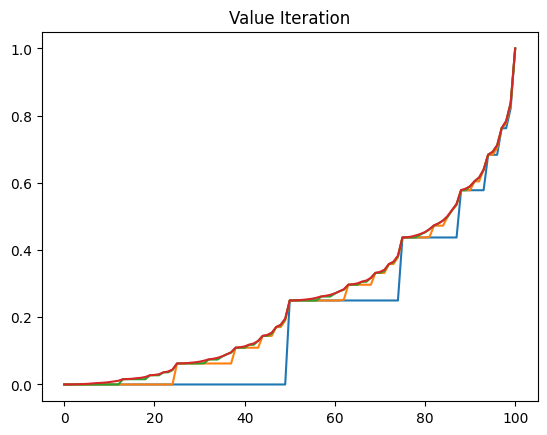

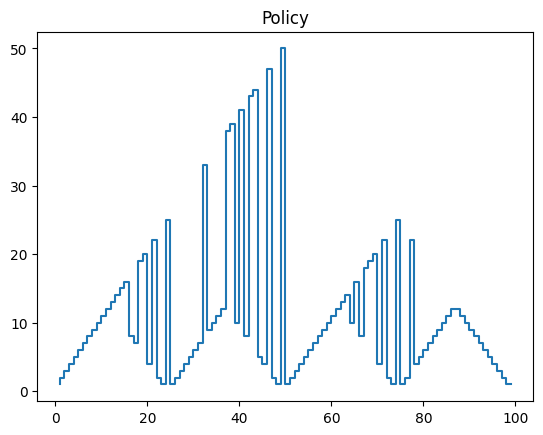

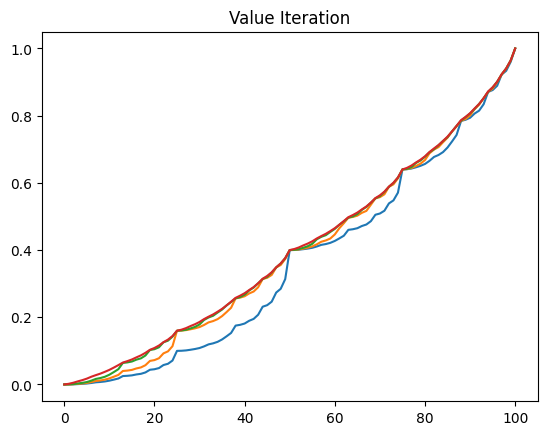

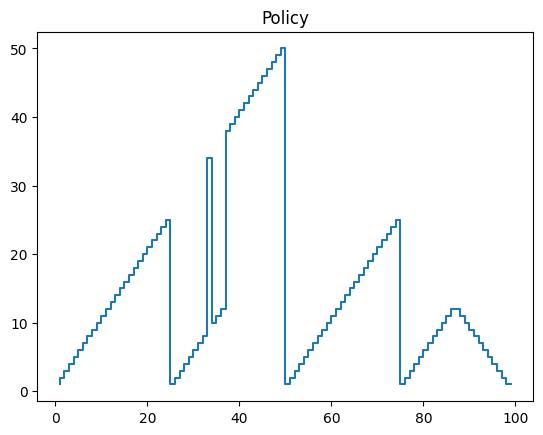

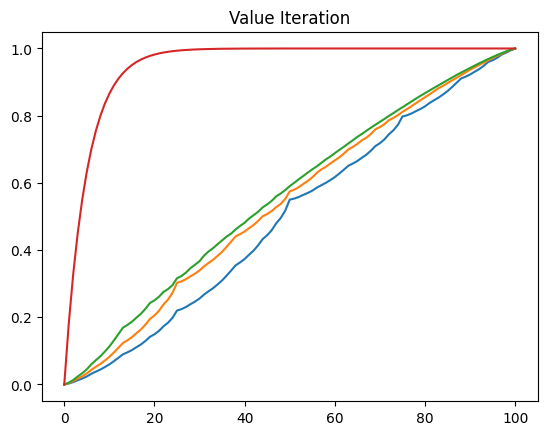

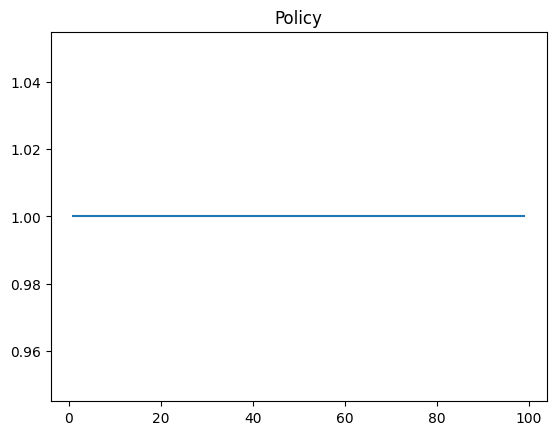

In [ ]:
# for sweeps, policy in results:
#     plt.figure()
#     for sweep in sweeps:
#         plt.plot(sweep)
#     plt.title("Value Iteration")

#     plt.figure()
#     print(policy)
#     plt.step(policy.keys(), policy.values())
#     plt.title("Policy")

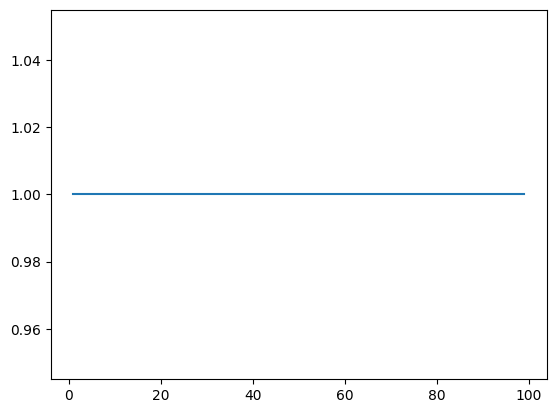

In [60]:
policy = results[0][1]
plt.step(policy.keys(), policy.values())